In [1]:
import numpy as np
import matplotlib.pyplot as plt

from modules.reader import read_linear
from modules.normalize import min_max_normalization
from modules.regularization import least_square_method, sgd
from modules.error import smape, mse, nmrse

import warnings
warnings.filterwarnings('ignore')

In [2]:
objs, m_attr, min_max, train_count, test_count = read_linear("../data/LR/2.txt")

In [3]:
norm_data, m_attr = min_max_normalization(objs, m_attr, min_max)

In [4]:
def find_best():
    best_sgd = 0
    best_lsm = 0
    bw_sgd = sgd(norm_data[:train_count], m_attr[:train_count], train_count, thau=best_sgd)[0]
    bw_lsm = least_square_method(norm_data[:train_count], m_attr[:train_count], thau=best_lsm)
    be_sgd = smape(norm_data[train_count:] @ bw_sgd, m_attr[train_count:])
    be_lsm = smape(norm_data[train_count:] @ bw_lsm, m_attr[train_count:])

    log = {
        "sgd": [(best_sgd, bw_sgd, be_sgd, mse(norm_data[train_count:] @ bw_sgd, m_attr[train_count:]), nmrse(norm_data[train_count:] @ bw_sgd, m_attr[train_count:]))],
        "lsm": [(best_lsm, bw_lsm, be_lsm, mse(norm_data[train_count:] @ bw_lsm, m_attr[train_count:]), nmrse(norm_data[train_count:] @ bw_lsm, m_attr[train_count:]))],
    }

    for thau in np.linspace(-2, 2, 2000):
        w_sgd = sgd(norm_data[:train_count], m_attr[:train_count], train_count, thau=thau)[0]
        w_lsm = least_square_method(norm_data[:train_count], m_attr[:train_count], thau=thau)
        e_sgd = smape(norm_data[train_count:] @ w_sgd, m_attr[train_count:])
        e_lsm = smape(norm_data[train_count:] @ w_lsm, m_attr[train_count:])

        log["sgd"].append((thau, w_sgd, e_sgd, mse(norm_data[train_count:] @ w_sgd, m_attr[train_count:]), nmrse(norm_data[train_count:] @ w_sgd, m_attr[train_count:])))
        log["lsm"].append((thau, w_lsm, e_lsm, mse(norm_data[train_count:] @ w_lsm, m_attr[train_count:]), nmrse(norm_data[train_count:] @ w_lsm, m_attr[train_count:])))

        if e_sgd < be_sgd:
            be_sgd = e_sgd
            best_sgd = thau

        if e_lsm < be_lsm:
            be_lsm = e_lsm
            best_lsm = thau

    return log, best_lsm, best_sgd

In [5]:
res = find_best()

In [6]:
print("Best thau for sgd:", res[2])
print("Best thau for least square method:", res[1])

Best thau for sgd: 0.007003501750875163
Best thau for least square method: 0.0010005002501247695


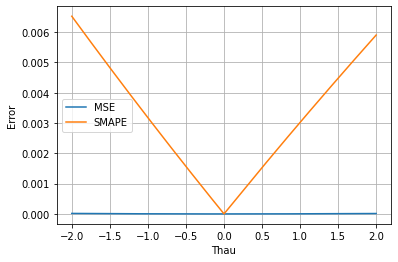

In [7]:
def smape_mse_lsm():
    log = res[0]["lsm"][1:]
    x = list(map(lambda t: t[0], log))
    mse = list(map(lambda t: t[3], log))
    smape = list(map(lambda t: t[2], log))
    plt.plot(x, mse, label="MSE")
    plt.plot(x, smape, label="SMAPE")
    plt.xlabel('Thau')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

smape_mse_lsm()

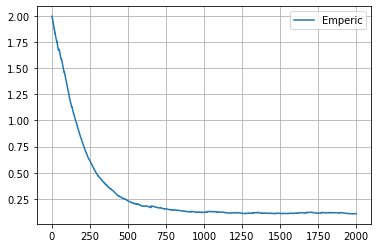

In [8]:
def exp_mid():
    thau = res[2]
    _, log, _ = sgd(norm_data[:train_count], m_attr[:train_count], train_count, thau=thau)
    plt.plot(list(map(lambda t: t[1], log)), label="Emperic")
    plt.legend()
    plt.grid(True)
    plt.show()

exp_mid()

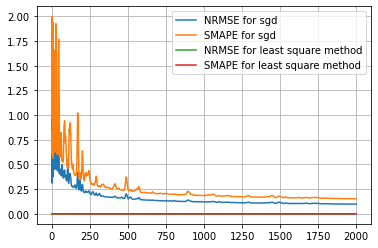

In [9]:
def graph():
    thau = res[2]
    _, _, err = sgd(norm_data[:train_count], m_attr[:train_count], train_count, thau=thau, log_err=True)
    plt.plot(list(map(lambda t: t[1], err)), label="NRMSE for sgd")
    plt.plot(list(map(lambda t: t[0], err)), label="SMAPE for sgd")

    length = len(err)

    thau = res[1]
    weight = least_square_method(norm_data[:train_count], m_attr[:train_count], thau=thau)
    _nrmse = nmrse(norm_data[train_count:] @ weight, m_attr[train_count:])
    _smape = smape(norm_data[train_count:] @ weight, m_attr[train_count:])
    plt.plot(np.repeat(_nrmse, length), label="NRMSE for least square method")
    plt.plot(np.repeat(_smape, length), label="SMAPE for least square method")
    plt.legend()
    plt.grid(True)
    plt.show()

graph()